## MACS30000 Assignment 8: Unsupervised learning
### Leoson Hoay
### December 4 2017

**Importing necessary packages:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as sm
import scipy.cluster.hierarchy as hr

df = pd.read_csv('../../assignments/unsupervised-learning/data/College.csv')

## Colleges (Problem 1)

In [2]:
#recode binary variable (run this only once)
df.Private.replace(('Yes', 'No'), (1, 0), inplace=True)

In [3]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660.0,1232.0,721.0,23.0,52.0,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0
1,1,2186.0,1924.0,512.0,16.0,29.0,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,30.0,12.2,16.0,10527.0,56.0
2,1,1428.0,1097.0,336.0,22.0,50.0,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,1,417.0,349.0,137.0,60.0,89.0,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,19016.0,59.0
4,1,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,4120.0,800.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.0


In [4]:
#standardize variables (not doing this for now, but I believe it should be done for this dataset)
#X_scaled = StandardScaler().fit_transform(df.values)

In [5]:
#Perform PCA
pca = PCA(2).fit(df)
#Create dataframe using PCs
X_pc = pd.DataFrame(pca.components_.T, index=df.columns, columns = ['PC1', 'PC2'])
X_pc

,PC1,PC2
Private,-0.000031,0.000040
Apps,0.557026,-0.039361
Accept,0.347712,-0.077162
Enroll,0.129854,-0.045413
Top10perc,0.001025,0.001706
Top25perc,0.001177,0.001497
F.Undergrad,0.670614,-0.283672
P.Undergrad,0.111113,-0.080380
Outstate,0.054842,0.569323
Room.Board,0.028866,0.105991


Text(0,0.5,'Component 2')

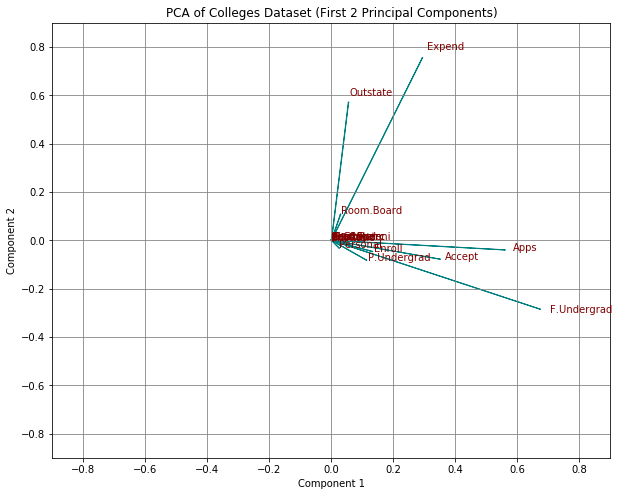

In [6]:
#Create PCA plot
%matplotlib inline
fig , ax = plt.subplots(figsize = (10, 8))
ax.set_xlim(-0.9, 0.9)
ax.set_ylim(-0.9, 0.9)
ax.grid(color = 'grey', linewidth = 0.8)

for i in range(len(df.columns)):
    ax.arrow(0, 0, X_pc.PC1[i], X_pc.PC2[i], color = "teal")
    
for i in X_pc[:].index:
    ax.annotate(i, (X_pc.PC1.loc[i] * 1.05, X_pc.PC2.loc[i] * 1.05), color='maroon')
    
ax.set_title('PCA of Colleges Dataset (First 2 Principal Components)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

From the plot we can observe that **'Apps', 'F.Undergrad', and 'Accept'** seem to be most correlated with Component 1 (above 0.3).

**'Outstate' and 'Expend'** seem to be most correlated with Component 2 (above 0.3).

## Colleges (Problem 2)

In [7]:
pca_all = PCA().fit(df)

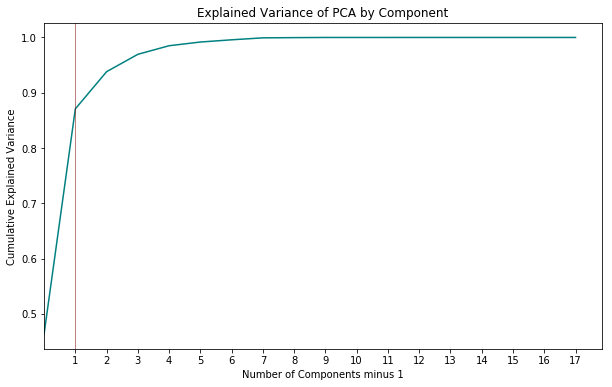

In [8]:
#plot scree plot
def var_explained():
    
    ax = figure(figsize = (10, 6)).gca()
    ax.plot(np.cumsum(pca_all.explained_variance_ratio_), color = "teal")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xlim(xmin=0)
    plt.xlabel('Number of Components minus 1')
    plt.xticks(list(range(1,18)))
    plt.ylabel('Cumulative Explained Variance')
    plt.axvline(x=1, linewidth=1, color='maroon', alpha=0.5)
    plt.title('Explained Variance of PCA by Component')
    show()
    
var_explained()

In [9]:
#Compute cumulative explained variance for first two components
pca_all.explained_variance_ratio_[:2].sum() * 100

87.082347523733276

Approximately 87.08% of the variance is explained by the first two components.

----

## Clustering states (Problem 1)

In [10]:
states_df = pd.read_csv("../../assignments/unsupervised-learning/data/USArrests.csv", index_col = 0)
states_df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [11]:
#standardize variables
X2_scaled = StandardScaler().fit_transform(states_df.values)
X2_scaled
#perform PCA
pca2 = PCA(2).fit(X2_scaled)
X_pc2 = pd.DataFrame(pca2.transform(X2_scaled), index = states_df.index, columns=["PC1", "PC2"])
X_pc2_vars = pd.DataFrame(pca2.components_.T, index = ['Murder', 'Assault', 'UrbanPop', 'Rape'], columns=["PC1", "PC2"])
print(X_pc2.head())
print(X_pc2_vars.head())

                 PC1       PC2
State                         
Alabama     0.985566  1.133392
Alaska      1.950138  1.073213
Arizona     1.763164 -0.745957
Arkansas   -0.141420  1.119797
California  2.523980 -1.542934
               PC1       PC2
Murder    0.535899  0.418181
Assault   0.583184  0.187986
UrbanPop  0.278191 -0.872806
Rape      0.543432 -0.167319


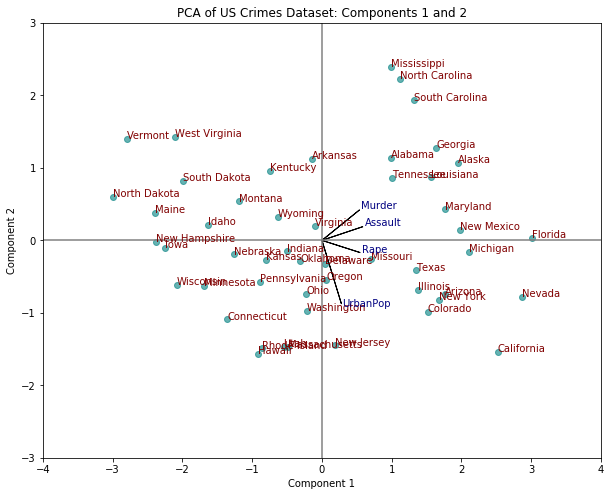

In [12]:
#generate scatterplot
def pca2_scatter(pc1, pc2):
    plt.close
    plt.figure(figsize = (10, 8))
    plt.xlim(-4,4)
    plt.ylim(-3,3)
    plt.hlines(0, -4, 4, linestyles='-', colors='grey')
    plt.vlines(0, -3, 3, linestyles='-', colors='grey')
    lw = 1
    
    #States
    plt.scatter(X_pc2['PC1'], X_pc2['PC2'], color = "teal", alpha=.6, lw=lw)
    
    for i in X_pc2[:].index:
        plt.annotate(i, (X_pc2.PC1.loc[i], X_pc2.PC2.loc[i]), color= 'maroon')
        
    #Variables
    for i in X_pc2_vars[:].index:
        plt.arrow(0,0,X_pc2_vars.PC1[i], X_pc2_vars.PC2[i])
    
    for i in X_pc2_vars[:].index:
        plt.annotate(i, (X_pc2_vars.PC1.loc[i] * 1.05, X_pc2_vars.PC2.loc[i] * 1.05), color= 'navy')
    
    plt.title('PCA of US Crimes Dataset: Components {} and {}'.format(pc1+1, pc2+1))
    plt.xlabel('Component {}'.format(pc1+1))
    plt.ylabel('Component {}'.format(pc2+1))
    plt.show()
    
pca2_scatter(0,1)

## Clustering states (Problems 2 - 5)

In [13]:
#K-means clustering with K=2
km_2 = KMeans(2, n_init=20).fit(states_df)

In [14]:
km_2.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1])

Text(0.5,1,'K Mean Classification (K = 2)')

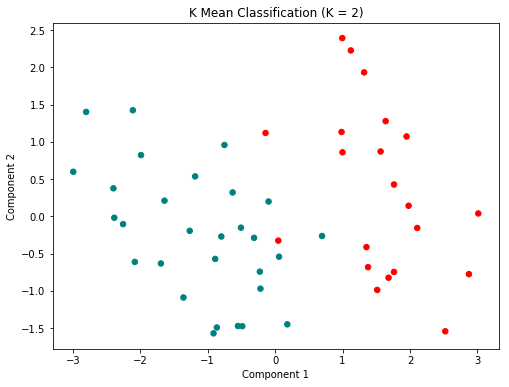

In [15]:
#create scatterplot
plt.figure(figsize=(8,6))

colormap = np.array(['red', 'teal'])
 
plt.scatter(X_pc2.PC1, X_pc2.PC2, c=colormap[km_2.labels_], s=30)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('K Mean Classification (K = 2)')

In [16]:
#K-means clustering with K=3
km_3 = KMeans(3, n_init=20).fit(states_df)
km_3.labels_

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0,
       1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 2])

Text(0.5,1,'K Mean Classification (K = 3)')

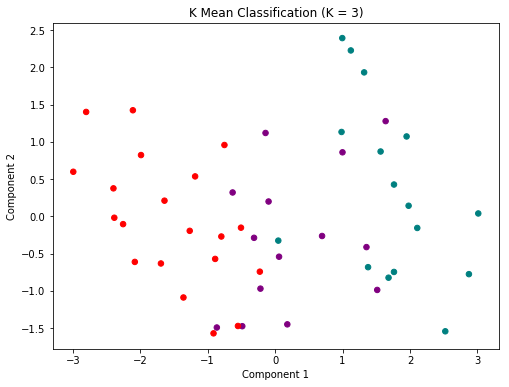

In [17]:
#create scatterplot
plt.figure(figsize=(8,6))

colormap = np.array(['red', 'teal', 'purple'])
 
plt.scatter(X_pc2.PC1, X_pc2.PC2, c=colormap[km_3.labels_], s=30)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('K Mean Classification (K = 3)')

In [18]:
#K-means clustering with K=4
km_4 = KMeans(4, n_init=20).fit(states_df)
km_4.labels_

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 2, 0, 3,
       0, 2, 1, 1, 0, 3, 2, 0, 0, 0, 3, 1, 2, 2, 1, 2, 0, 3, 2, 2, 1, 3, 2,
       2, 3, 3, 2])

Text(0.5,1,'K Mean Classification (K = 4)')

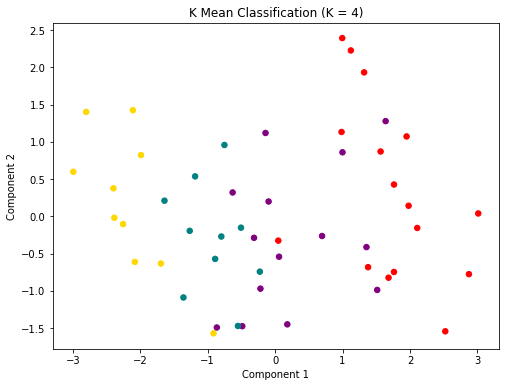

In [19]:
#create scatterplot
plt.figure(figsize=(8,6))

colormap = np.array(['red', 'teal', 'purple', 'gold'])
 
plt.scatter(X_pc2.PC1, X_pc2.PC2, c=colormap[km_4.labels_], s=30)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('K Mean Classification (K = 4)')

In [20]:
#K-means clustering with K=3, using PC score vectors
km_3_pc2 = KMeans(3, n_init=20).fit(X_pc2)
km_3_pc2.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1,
       0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 2, 1,
       1, 2, 2, 1])

Text(0.5,1,'K Mean Classification (K = 3) using PC Score Vectors')

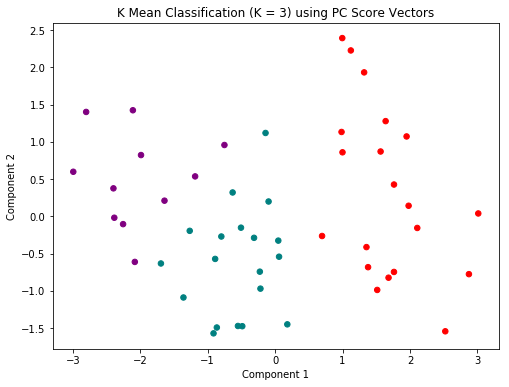

In [21]:
#create scatterplot
plt.figure(figsize=(8,6))

colormap = np.array(['red', 'teal', 'purple'])
 
plt.scatter(X_pc2.PC1, X_pc2.PC2, c=colormap[km_3_pc2.labels_], s=30)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('K Mean Classification (K = 3) using PC Score Vectors')

Using the PC score vectors seems to increase the accuracy and boundary discreteness of the cluster classifications as compared to using the raw data. This is likely due to the fact that the classification based on the PC score vectors is being scaled and fitted on the PCA values, and thus the points are more accurately labelled in the 2-component vector space.

## Clustering states (Problem 6)

Text(0.5,1,'Hierarchichal Dendrogram')

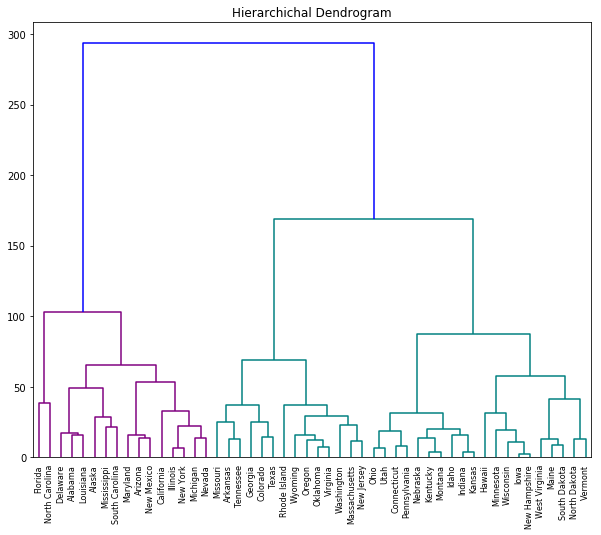

In [22]:
h_cluster = hr.complete(states_df)
plt.figure(figsize = (10,8))
hr.set_link_color_palette(['purple','teal', 'maroon', 'orange'])
hr.dendrogram(h_cluster, labels = states_df.index)
plt.title("Hierarchichal Dendrogram")

## Clustering states (Problem 7)

Text(0.5,1,'Truncated Hierarchical Dendrogram (Clusters = 3)')

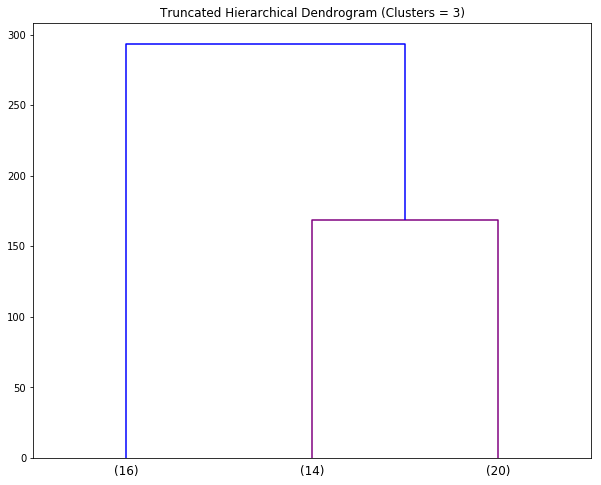

In [23]:
plt.figure(figsize = (10,8))
hr.dendrogram(h_cluster, truncate_mode='lastp', p=3, labels = states_df.index)
plt.title("Truncated Hierarchical Dendrogram (Clusters = 3)")

Comparing the above plots, we can observe the groupings.

**Group 1**: Alabama, Alaska, Arizona, California, Delaware, Florida, Illinois, Louisiana, Maryland, Michigan, Mississippi, Nevada, New Mexico, New York, North Carolina, South Carolina

**Group 2**: Arkansas, Colorado, Georgia, Massachusetts, Missouri, New Jersey, Oklahoma, Oregon, Rhode Island, Tennessee, Texas, Virginia, Washington, Wyoming

**Group 3**: Connecticut, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Minnesota, Montana, Nebraska, New Hampshire, North Dakota, Ohio, Pennsylvania, South Dakota, Utah, Vermont, West Virginia, Wisconsin

## Clustering states (Problem 8)

In [24]:
states_df_scaled = pd.DataFrame(X2_scaled, index = states_df.index, columns= states_df.columns)

In [25]:
states_df_scaled.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


Text(0.5,1,'Hierarchichal Dendrogram (Scaled)')

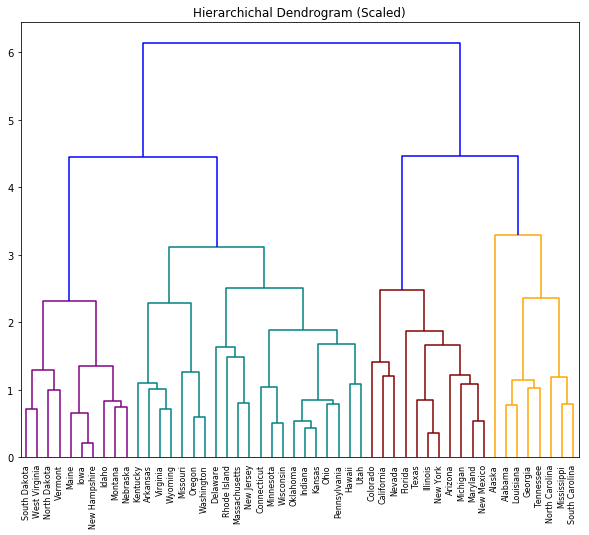

In [26]:
h_scaled = hr.complete(states_df_scaled)
plt.figure(figsize = (10,8))
hr.dendrogram(h_scaled, labels = states_df.index)
plt.title("Hierarchichal Dendrogram (Scaled)")

Scaling the variables allows disparate crime variables to be more comparable - the raw values between 'Assault' and 'Rape', for example, will obviously differ significantly in scale. In this particular case, I believe scaling is necessary for the reason stated above.

This seems to result in the formation of clusters at an earlier height given a more compressed value range, and also some rearrangement of states between clusters at a given height. 